# A1: Data Curation

The goal of this assignment is to construct, analyze, and publish a dataset of monthly traffic on English Wikipedia from January 1 2008 through August 30 2020. 

## Step 1: Gathering the data

In [168]:
import json
import requests
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [47]:
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

#### Setting the parameters for pageview and pagecount legacy REST APIs

In [48]:

pagecounts_params_desktop = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                 "end" : "2016080100"
                    }

pagecounts_params_mobile = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                 "end" : "2016080100"
                    }


pageviews_params_desktop = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : '2020090100'
                        }

pageviews_params_mobileweb = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : '2020090100'
                        }

pageviews_params_mobileapp = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : '2020090100'
                        }

In [49]:
headers = {
    'User-Agent': 'https://github.com/rathodmansi',
    'From': 'mrathod@uw.edu'
}

In [50]:
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

In [51]:
pagecounts_desktop_site_20080101_20160801 = api_call(endpoint_legacy, pagecounts_params_desktop)
pagecounts_mobile_site_20080101_20160801 = api_call(endpoint_legacy, pagecounts_params_mobile)

In [52]:
pageviews_desktop_site_20150701_20200901 = api_call(endpoint_pageviews, pageviews_params_desktop)
pageviews_mobile_web_20150701_20200901 = api_call(endpoint_pageviews, pageviews_params_mobileweb)
pageviews_mobile_app_20150701_20200901 = api_call(endpoint_pageviews, pageviews_params_mobileapp)

In [53]:
with open('pagecounts_desktop-site_200801-201607.json', 'w') as outfile:
    json.dump(pagecounts_desktop_site_20080101_20160801, outfile)

with open('pagecounts_mobile-site_200801-201607.json', 'w') as outfile:
    json.dump(pagecounts_mobile_site_20080101_20160801, outfile)  

with open('pageviews_desktop_201507-202008.json', 'w') as outfile:
    json.dump(pageviews_desktop_site_20150701_20200901, outfile) 

with open('pageviews_mobile-web_201507-202008.json', 'w') as outfile:
    json.dump(pageviews_mobile_web_20150701_20200901, outfile) 
    
with open('pageviews_mobile-app_201507-202008.json', 'w') as outfile:
    json.dump(pageviews_mobile_app_20150701_20200901, outfile)

## Step 2: Processing the data

In [69]:
pagecounts_desktop_site = pd.json_normalize(pagecounts_desktop_site_20080101_20160801['items'])
pagecounts_mobile_site = pd.json_normalize(pagecounts_mobile_site_20080101_20160801['items'])

pageviews_desktop_site = pd.json_normalize(pageviews_desktop_site_20150701_20200901['items'])
pageviews_mobile_web = pd.json_normalize(pageviews_mobile_web_20150701_20200901['items'])
pageviews_mobile_app = pd.json_normalize(pageviews_mobile_app_20150701_20200901['items'])

In [70]:
pagecounts_desktop_site.head()
pageviews_desktop_site.head()

,project,access-site,granularity,timestamp,count
0,en.wikipedia,desktop-site,monthly,2008010100,4930902570
1,en.wikipedia,desktop-site,monthly,2008020100,4818393763
2,en.wikipedia,desktop-site,monthly,2008030100,4955405809
3,en.wikipedia,desktop-site,monthly,2008040100,5159162183
4,en.wikipedia,desktop-site,monthly,2008050100,5584691092


,project,access,agent,granularity,timestamp,views
0,en.wikipedia,desktop,user,monthly,2015070100,4376666686
1,en.wikipedia,desktop,user,monthly,2015080100,4332482183
2,en.wikipedia,desktop,user,monthly,2015090100,4485491704
3,en.wikipedia,desktop,user,monthly,2015100100,4477532755
4,en.wikipedia,desktop,user,monthly,2015110100,4287720220


#### Removing unnescessary columns: project, granlularity

In [71]:
## Removing unnescessary columns: project, granlularity
pagecounts_desktop_site = pagecounts_desktop_site.drop(['project','granularity'], axis=1)
pagecounts_mobile_site = pagecounts_mobile_site.drop(['project','granularity'], axis=1)

pageviews_desktop_site = pageviews_desktop_site.drop(['project','granularity','agent'], axis=1)
pageviews_mobile_web = pageviews_mobile_web.drop(['project','granularity','agent'], axis=1)
pageviews_mobile_app = pageviews_mobile_app.drop(['project','granularity','agent'], axis=1)

In [77]:
pagecounts_desktop_site.head()

,access-site,timestamp,count
0,desktop-site,2008010100,4930902570
1,desktop-site,2008020100,4818393763
2,desktop-site,2008030100,4955405809
3,desktop-site,2008040100,5159162183
4,desktop-site,2008050100,5584691092


#### PAGECOUNTS df: Pivoting desktop-site views to columns

In [ ]:
## PAGECOUNTS df: Pivoting desktop-site views to columns
pc_desktop = pagecounts_desktop_site.pivot(index='timestamp',columns = 'access-site', values='count').reset_index()
pc_desktop = pc_desktop.rename({'desktop-site': 'pagecount_desktop_views'}, axis=1)
pc_desktop.head()

pc_mobile = pagecounts_mobile_site.pivot(index='timestamp',columns = 'access-site', values='count').reset_index()
pc_mobile = pc_mobile.rename({'mobile-site': 'pagecount_mobile_views'}, axis=1)
pc_mobile.head()

In [113]:
## Merging pagecounts' desktop and mobile view
print('Before join:', pc_desktop.shape, pc_mobile.shape)
pc_views = pd.merge(pc_desktop, pc_mobile, on = 'timestamp',how='outer')
print('After join:', pc_views.shape)
pc_views.head()

Before join: (103, 2) (22, 2)
After join: (103, 3)


access-site,timestamp,pagecount_desktop_views,pagecount_mobile_views
0,2008010100,4930902570,NaN
1,2008020100,4818393763,NaN
2,2008030100,4955405809,NaN
3,2008040100,5159162183,NaN
4,2008050100,5584691092,NaN


In [94]:
pageviews_desktop_site.head()
pageviews_mobile_app.head()
pageviews_mobile_web.head()

,access,timestamp,views
0,desktop,2015070100,4376666686
1,desktop,2015080100,4332482183
2,desktop,2015090100,4485491704
3,desktop,2015100100,4477532755
4,desktop,2015110100,4287720220


,access,timestamp,views
0,mobile-app,2015070100,109624146
1,mobile-app,2015080100,109669149
2,mobile-app,2015090100,96221684
3,mobile-app,2015100100,94523777
4,mobile-app,2015110100,94353925


,access,timestamp,views
0,mobile-web,2015070100,3179131148
1,mobile-web,2015080100,3192663889
2,mobile-web,2015090100,3073981649
3,mobile-web,2015100100,3173975355
4,mobile-web,2015110100,3142247145


#### PAGEVIEWS Df:  Pivoting the desktop, mobile-app & mobile-web rows to column
##Merging the mobile-web and mobile-app data into one single table


In [95]:
## PAGEVIEWS Df:  Pivoting the desktop, mobile-app & mobile-web rows to column
##Merging the mobile-web and mobile-app data into one single table
pv_desktop = pageviews_desktop_site.pivot(index='timestamp',columns = 'access', values='views').reset_index()
pv_desktop = pv_desktop.rename({'desktop': 'pv_desktop'}, axis=1)
pv_desktop.head()

pv_moweb = pageviews_mobile_web.pivot(index='timestamp',columns = 'access', values='views').reset_index()
pv_moweb = pv_moweb.rename({'mobile-web': 'pv_moweb'}, axis=1)
pv_moweb.head()

pv_moapp = pageviews_mobile_app.pivot(index='timestamp',columns = 'access', values='views').reset_index()
pv_moapp = pv_moapp.rename({'mobile-app': 'pv_moapp'}, axis=1)
pv_moapp.head()

access,timestamp,pv_desktop
0,2015070100,4376666686
1,2015080100,4332482183
2,2015090100,4485491704
3,2015100100,4477532755
4,2015110100,4287720220


access,timestamp,pv_moweb
0,2015070100,3179131148
1,2015080100,3192663889
2,2015090100,3073981649
3,2015100100,3173975355
4,2015110100,3142247145


access,timestamp,pv_moapp
0,2015070100,109624146
1,2015080100,109669149
2,2015090100,96221684
3,2015100100,94523777
4,2015110100,94353925


#### Merging pageview df mobile-web and mobile-app column to total mobiel views

In [187]:
## Earlier shape of both DF
print('Shape before join:', pv_moapp.shape, pv_moweb.shape)
pv_mobile = pd.merge(pv_moapp, pv_moweb, on = 'timestamp', how='outer')
pv_mobile.head()
print('Shape after join:', pv_mobile.shape)
## Calculating the final mobile views column
pv_mobile['pageview_mobile_views'] = pv_mobile.pv_moapp + pv_mobile.pv_moweb
pv_mobile.head()

Shape before join: (62, 2) (62, 2)


access,timestamp,pv_moapp,pv_moweb
0,2015070100,109624146,3179131148
1,2015080100,109669149,3192663889
2,2015090100,96221684,3073981649
3,2015100100,94523777,3173975355
4,2015110100,94353925,3142247145


Shape after join: (62, 3)


access,timestamp,pv_moapp,pv_moweb,pageview_mobile_views
0,2015070100,109624146,3179131148,3288755294
1,2015080100,109669149,3192663889,3302333038
2,2015090100,96221684,3073981649,3170203333
3,2015100100,94523777,3173975355,3268499132
4,2015110100,94353925,3142247145,3236601070


In [115]:
## Merging pv_desktop views to the pv_mobile views
print('Shape before join:', pv_desktop.shape, pv_mobile.shape)
pv_views = pd.merge(pv_desktop, pv_mobile, on = 'timestamp', how='outer')
print('Shape after join:', pv_views.shape)
pv_views.head()
print('Dropping uneccasry columns')
pv_views = pv_views.drop(['pv_moapp','pv_moweb'], axis=1)
pv_views.rename({'pv_desktop': 'pageview_desktop_views'}, axis=1, inplace = True)
pv_views.head()

Shape before join: (62, 2) (62, 4)
Shape after join: (62, 5)


access,timestamp,pv_desktop,pv_moapp,pv_moweb,pageview_mobile_views
0,2015070100,4376666686,109624146,3179131148,3288755294
1,2015080100,4332482183,109669149,3192663889,3302333038
2,2015090100,4485491704,96221684,3073981649,3170203333
3,2015100100,4477532755,94523777,3173975355,3268499132
4,2015110100,4287720220,94353925,3142247145,3236601070


Dropping uneccasry columns


access,timestamp,pageview_desktop_views,pageview_mobile_views
0,2015070100,4376666686,3288755294
1,2015080100,4332482183,3302333038
2,2015090100,4485491704,3170203333
3,2015100100,4477532755,3268499132
4,2015110100,4287720220,3236601070


In [161]:
## Pivoting Pagecount df
print('Before join:', pc_views.shape, pv_views.shape)
enwiki_views = pd.merge(pc_views, pv_views, on = 'timestamp', how ='outer')
print('After join:', enwiki_views.shape)
enwiki_views.head()

Before join: (103, 3) (62, 3)
After join: (152, 5)


,timestamp,pagecount_desktop_views,pagecount_mobile_views,pageview_desktop_views,pageview_mobile_views
0,2008010100,4.930903e+09,NaN,NaN,NaN
1,2008020100,4.818394e+09,NaN,NaN,NaN
2,2008030100,4.955406e+09,NaN,NaN,NaN
3,2008040100,5.159162e+09,NaN,NaN,NaN
4,2008050100,5.584691e+09,NaN,NaN,NaN


In [162]:
## Replacing the NaN values with 0
enwiki_views.fillna(0, inplace = True)
## Calculating the total views column for pageview & pagecount
enwiki_views['pagecount_all_views'] = enwiki_views.pagecount_desktop_views + enwiki_views.pagecount_mobile_views
enwiki_views['pageview_all_views'] = enwiki_views.pageview_desktop_views + enwiki_views.pageview_mobile_views
enwiki_views.head()

,timestamp,pagecount_desktop_views,pagecount_mobile_views,pageview_desktop_views,pageview_mobile_views,pagecount_all_views,pageview_all_views
0,2008010100,4.930903e+09,0.0,0.0,0.0,4.930903e+09,0.0
1,2008020100,4.818394e+09,0.0,0.0,0.0,4.818394e+09,0.0
2,2008030100,4.955406e+09,0.0,0.0,0.0,4.955406e+09,0.0
3,2008040100,5.159162e+09,0.0,0.0,0.0,5.159162e+09,0.0
4,2008050100,5.584691e+09,0.0,0.0,0.0,5.584691e+09,0.0


In [163]:
## Splitting timestamp into year and month
enwiki_views['ts2'] = pd.to_datetime(enwiki_views['timestamp'], format='%Y%m%d%H')
enwiki_views['year'] = pd.DatetimeIndex(enwiki_views['ts2']).year
enwiki_views['month'] = pd.DatetimeIndex(enwiki_views['ts2']).month
enwiki_views.drop(['timestamp','ts2'], axis=1, inplace=True)
enwiki_views.sort_values(['year','month'], inplace = True)
enwiki_views.head()

,pagecount_desktop_views,pagecount_mobile_views,pageview_desktop_views,pageview_mobile_views,pagecount_all_views,pageview_all_views,year,month
0,4.930903e+09,0.0,0.0,0.0,4.930903e+09,0.0,2008,1
1,4.818394e+09,0.0,0.0,0.0,4.818394e+09,0.0,2008,2
2,4.955406e+09,0.0,0.0,0.0,4.955406e+09,0.0,2008,3
3,5.159162e+09,0.0,0.0,0.0,5.159162e+09,0.0,2008,4
4,5.584691e+09,0.0,0.0,0.0,5.584691e+09,0.0,2008,5


In [164]:
## Saving the data as csv
enwiki_views.to_csv('en-wikipedia_traffic_200801-202008.csv', index= False)

In [165]:
enwiki_views.tail()

,pagecount_desktop_views,pagecount_mobile_views,pageview_desktop_views,pageview_mobile_views,pagecount_all_views,pageview_all_views,year,month
147,0.0,0.0,3.798373e+09,5.505742e+09,0.0,9.304115e+09,2020,4
148,0.0,0.0,3.078094e+09,5.231700e+09,0.0,8.309794e+09,2020,5
149,0.0,0.0,2.721329e+09,4.573975e+09,0.0,7.295304e+09,2020,6
150,0.0,0.0,2.638936e+09,4.809714e+09,0.0,7.448651e+09,2020,7
151,0.0,0.0,2.613058e+09,4.803309e+09,0.0,7.416367e+09,2020,8


## Step 3: Analyze the data

In [166]:
## merging yyyy and dd to date column
enwiki_views['day'] = '01'
enwiki_views['date'] = pd.to_datetime(enwiki_views[['year','month','day']])
enwiki_views.head()

,pagecount_desktop_views,pagecount_mobile_views,pageview_desktop_views,pageview_mobile_views,pagecount_all_views,pageview_all_views,year,month,day,date
0,4.930903e+09,0.0,0.0,0.0,4.930903e+09,0.0,2008,1,01,2008-01-01
1,4.818394e+09,0.0,0.0,0.0,4.818394e+09,0.0,2008,2,01,2008-02-01
2,4.955406e+09,0.0,0.0,0.0,4.955406e+09,0.0,2008,3,01,2008-03-01
3,5.159162e+09,0.0,0.0,0.0,5.159162e+09,0.0,2008,4,01,2008-04-01
4,5.584691e+09,0.0,0.0,0.0,5.584691e+09,0.0,2008,5,01,2008-05-01


<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Page Views on English Wikipedia (x1,000,00)')

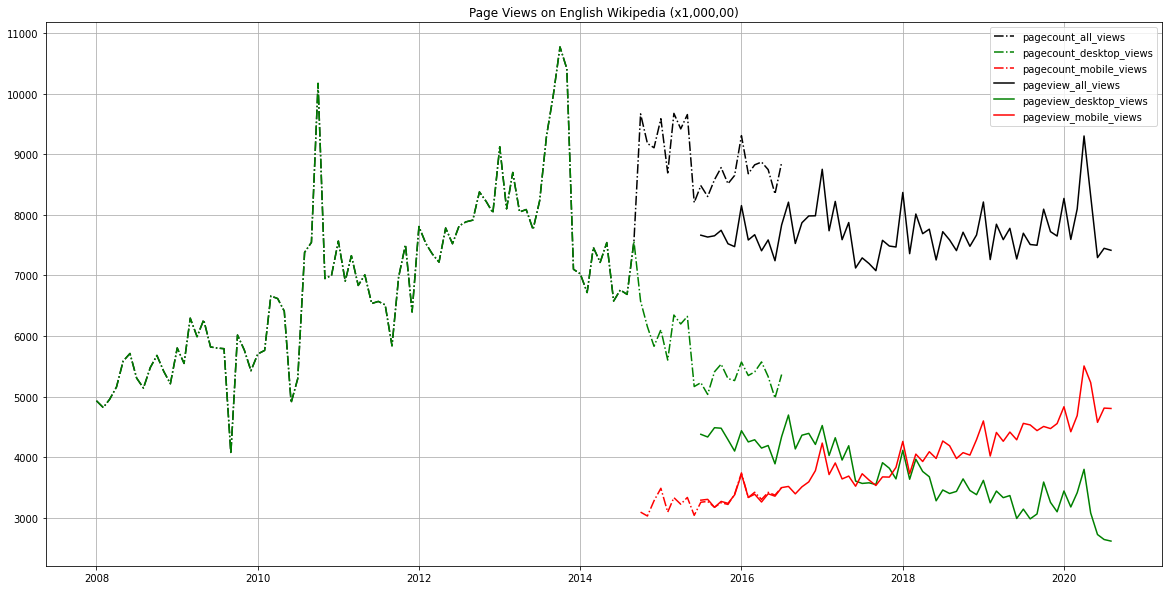

In [185]:
## Drawing the plot
plt.figure(figsize=(20,10))

plt.plot(enwiki_views['date'],enwiki_views['pagecount_all_views'].replace(0,np.nan)/1000000, color='black', linestyle='-.')
plt.plot(enwiki_views['date'],enwiki_views['pagecount_desktop_views'].replace(0,np.nan)/1000000, color='green', linestyle='-.')
plt.plot(enwiki_views['date'],enwiki_views['pagecount_mobile_views'].replace(0,np.nan)/1000000, color='red', linestyle='-.')

plt.plot(enwiki_views['date'],enwiki_views['pageview_all_views'].replace(0,np.nan)/1000000, color='black', linestyle='-')
plt.plot(enwiki_views['date'],enwiki_views['pageview_desktop_views'].replace(0,np.nan)/1000000, color='green', linestyle='-')
plt.plot(enwiki_views['date'],enwiki_views['pageview_mobile_views'].replace(0,np.nan)/1000000, color='red', linestyle='-')
plt.title("Page Views on English Wikipedia (x1,000,00)")
plt.legend(["pagecount_all_views","pagecount_desktop_views", "pagecount_mobile_views", "pageview_all_views","pageview_desktop_views","pageview_mobile_views"])
plt.grid()
plt.savefig("Visualisation.png")
